In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# open elos_1 and elos_2 pickles

with open('elos_1.pkl', 'rb') as f:
    elos_1 = pickle.load(f)

with open('elos_2.pkl', 'rb') as f:
    elos_2 = pickle.load(f)

idx_to_name = {
    "0": "random",
    "1": "none_1_itrs",
    "2": "none_2_itrs",
    "3": "none_3_itrs",
    "4": "none_4_itrs",
    "5": "none_5_itrs",
    "6": "linear_1_itrs",
    "7": "linear_2_itrs",
    "8": "linear_3_itrs",
    "9": "linear_4_itrs",
    "10": "linear_5_itrs",
    "11": "pq_1_itrs",
    "12": "pq_2_itrs",
    "13": "pq_3_itrs",
    "14": "pq_4_itrs",
    "15": "pq_5_itrs",
    "16": "reset_1_itrs",
    "17": "reset_2_itrs",
    "18": "reset_3_itrs",
    "19": "reset_4_itrs",
    "20": "reset_5_itrs",
    "21": "sym_1_itrs",
    "22": "sym_2_itrs",
    "23": "sym_3_itrs",
    "24": "sym_4_itrs",
    "25": "sym_5_itrs",
    "26": "flamingo_1_itrs",
    "27": "flamingo_2_itrs",
    "28": "flamingo_3_itrs",
    "29": "flamingo_4_itrs",
    "30": "flamingo_5_itrs"
}

name_to_idx = {v: k for k, v in idx_to_name.items()}

{'random': 1052.2069296280213, 'none_1_itrs': 1410.6355854118765, 'none_2_itrs': 1332.3077033617685, 'none_3_itrs': 1360.8330673685077, 'none_4_itrs': 1407.0138086517634, 'none_5_itrs': 1550.2207253043155, 'linear_1_itrs': 1259.132270137405, 'linear_2_itrs': 1489.1780552809691, 'linear_3_itrs': 1560.0377678459859, 'linear_4_itrs': 1379.2433444937942, 'linear_5_itrs': 1435.843415796157, 'pq_1_itrs': 1290.2803515686276, 'pq_2_itrs': 1430.7334017807884, 'pq_3_itrs': 1383.273028858832, 'pq_4_itrs': 1373.4208436487972, 'pq_5_itrs': 1393.3646631507445, 'reset_1_itrs': 1474.5957937115513, 'reset_2_itrs': 1393.800731305565, 'reset_3_itrs': 1554.1789176089549, 'reset_4_itrs': 1720.2500070472158, 'reset_5_itrs': 1760.4385780592468, 'sym_1_itrs': 1257.8800400838916, 'sym_2_itrs': 1436.152481986947, 'sym_3_itrs': 1472.5599448632152, 'sym_4_itrs': 1636.028482993384, 'sym_5_itrs': 1633.8374499180238, 'flamingo_1_itrs': 1450.8385162958841, 'flamingo_2_itrs': 1852.3456113895006, 'flamingo_3_itrs': 188

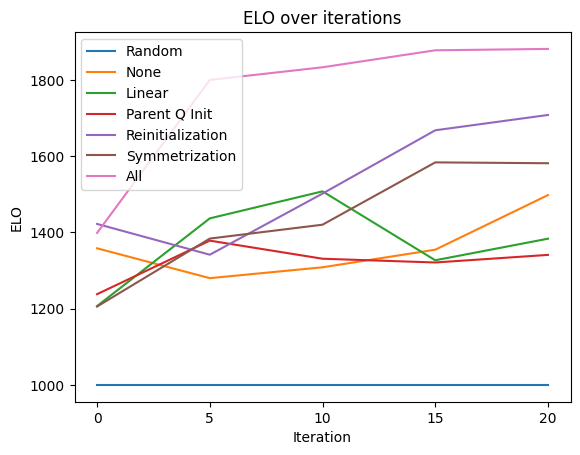

1000.0


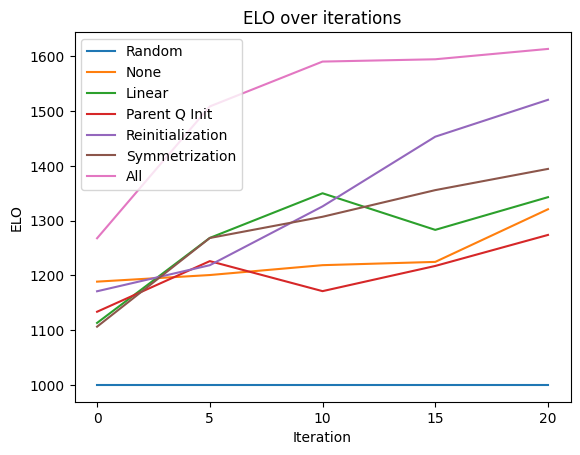

In [14]:
print(elos_1)
print(elos_2)


for data in (elos_1, elos_2):
    data = {name_to_idx[k]: v for k, v in data.items()}
    random_elo = data["0"]

    shift = 1000 - random_elo
    
    random_elo += shift
    none_elos = [data[str(i)] + shift for i in range(1, 6)]
    linear_elos = [data[str(i)] + shift for i in range(6, 11)]
    pq_elos = [data[str(i)] + shift for i in range(11, 16)]
    reset_elos = [data[str(i)] + shift for i in range(16, 21)]
    sym_elos = [data[str(i)] + shift for i in range(21, 26)]
    flamingo_elos = [data[str(i)] + shift for i in range(26, 31)]
    
    # plot all elos on the same graph
    plt.figure()
    plt.plot([random_elo]*5, label="Random")
    plt.plot(none_elos, label="None")
    plt.plot(linear_elos, label="Linear")
    plt.plot(pq_elos, label="Parent Q Init")
    plt.plot(reset_elos, label="Reinitialization")
    plt.plot(sym_elos, label="Symmetrization")
    plt.plot(flamingo_elos, label="All")

    # rescale x axis to be [0, 5, 10, 15, 20] from [0, 1, 2, 3, 4]
    plt.xticks([0, 1, 2, 3, 4], [0, 5, 10, 15, 20])
    
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("ELO")
    plt.title("ELO over iterations")
    plt.show()


